In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

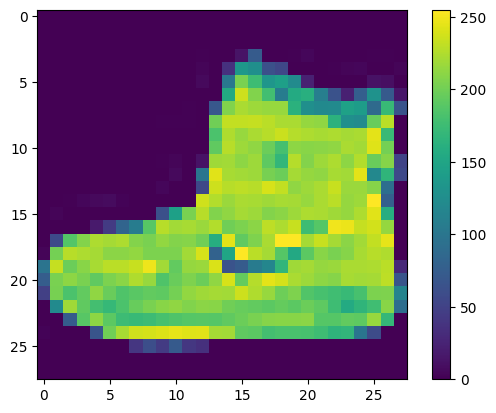

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

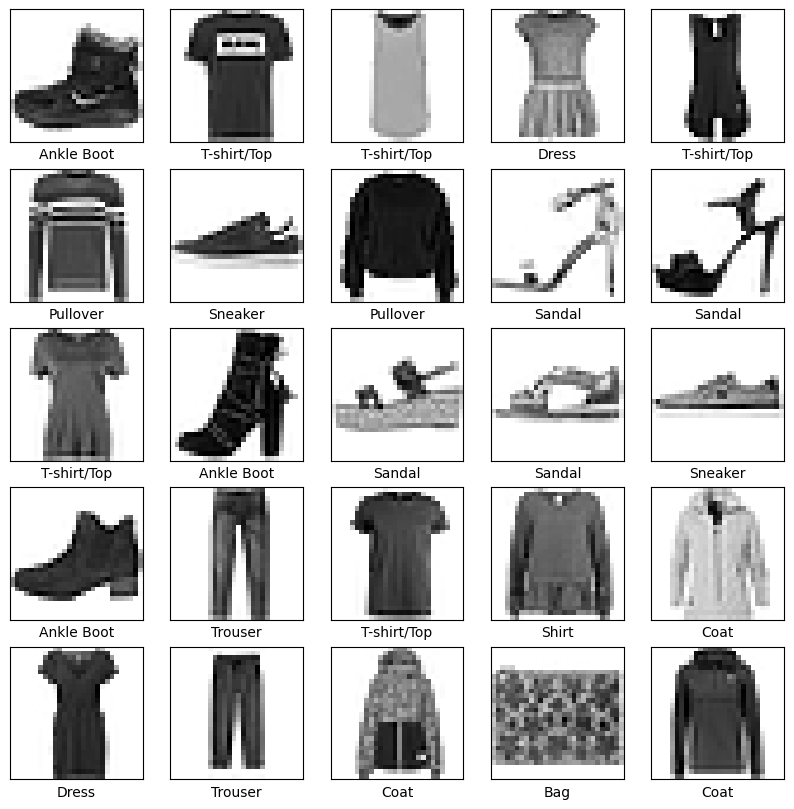

In [ ]:
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [ ]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),keras.layers.Dense(128,activation=tf.nn.relu),keras.layers.Dense(10,activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5017 - accuracy: 0.8226
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3803 - accuracy: 0.8625
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3393 - accuracy: 0.8750
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3145 - accuracy: 0.8839
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2969 - accuracy: 0.8910


In [ ]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print('Test Accuracy:',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3583 - accuracy: 0.8687
Test Accuracy: 0.8687000274658203


In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[0]

array([7.9086540e-06, 5.7810943e-09, 5.2027053e-07, 6.7154325e-08,
       9.1162356e-08, 7.1367403e-03, 8.0805521e-06, 6.3376807e-02,
       1.5168905e-05, 9.2945457e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9